In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:

path = r"D:/Projects/IMC_Challenge/Round_2/logs/conversion_data.log"

df = pd.read_csv(path, sep=";",skiprows=range(0, 5005),nrows=4000)
df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
print(df.columns.values.tolist())

# # create dataframes for separate instruments and calculate rolling averages
df_orch = df.loc[df["product"] == "ORCHIDS"]
# df_am['it'] = df_am['timestamp']/100
# df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()

# df_star = df.loc[df["product"] == "STARFRUIT"]
# df_star['it'] = df_star['timestamp']/100
# df_star['20it_rolling'] = df_star['mid_price'].rolling(20).mean()


['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']


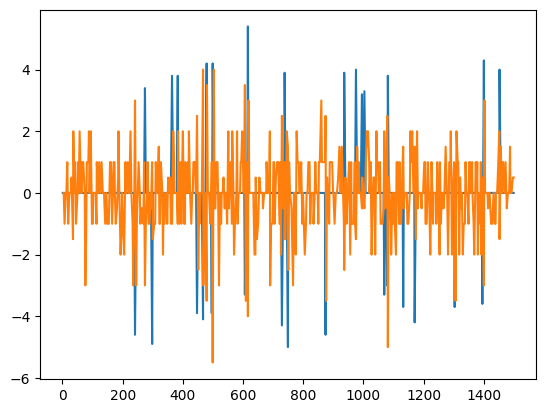

In [161]:
plt.plot((0.1*(df_orch['bid_volume_3']+df_orch['bid_volume_2']+df_orch['bid_volume_1']-df_orch['ask_volume_3']-df_orch['ask_volume_2']-df_orch['ask_volume_1']))[:500])
plt.plot(df_orch['mid_price'].diff()[:500])
#plt.plot(df_orch['ask_volume_1'][:200])


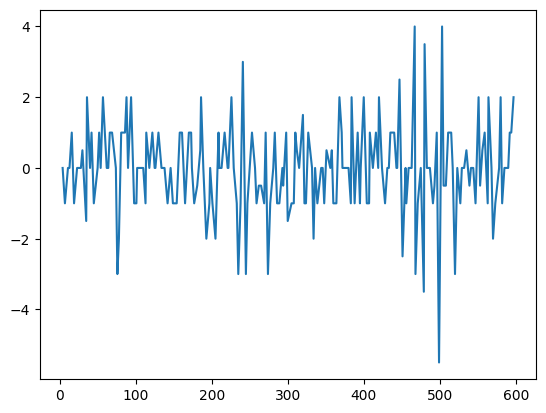

In [163]:
import pandas as pd
import re
import json

df = pd.DataFrame()
logs = []

# Read the .log file (replace 'your_file.log' with the actual file path)
with open(r"D:/Projects/IMC_Challenge/Round_2/logs/conversion_data.log", 'r') as file:
    while True:
        line = file.readline()  
        match = re.search(r'"lambdaLog":\s*"(.*?)"', line)

        if match:
            values = str(match.group(1)).split("\n")
            logs.append(values)
            #df.add({"Values": values})

        if not line:
            break

In [164]:
df = pd.DataFrame(columns=['bid','ask','import','export','transport','sunlight','humidity'])
for log in logs:
    sp = log[0].split('\\n')
    
    if log[0]!="":
        df.loc[len(df.index)] = df2
        df2 = {'bid': sp[0], 'ask': sp[1], 'import': sp[2], 'export': sp[3], 'transport' : sp[4], 'sunlight':sp[5], 'humidity':sp[6]} 
    #df = df.append(df2, ignore_index = True) 
#df.fillna(0)

In [165]:
df['humidity'].convert_dtypes('float')

0       84.98128
1           70.0
2       70.02271
3      70.045395
4       70.06803
         ...    
995     84.88814
996      84.9067
997      84.9253
998     84.94393
999     84.96259
Name: humidity, Length: 1000, dtype: string

[]

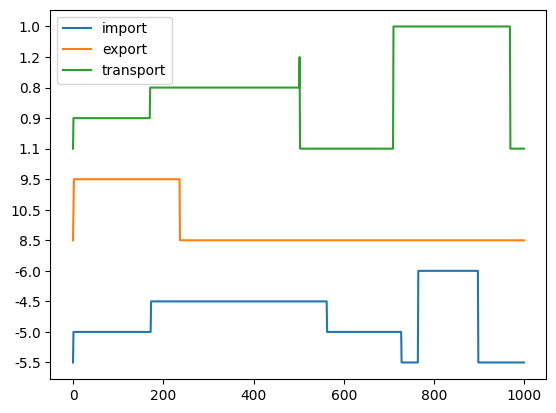

In [166]:
plt.plot(df['import'],label = 'import')
plt.plot(df['export'],label='export')
plt.plot(df['transport'],label='transport')
plt.legend()
plt.plot()

(1000,)
(1000,)


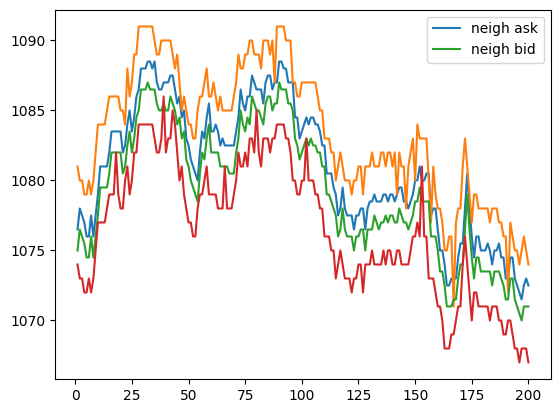

In [207]:
neigh_diff = (np.asarray(df['ask'][:1000], float)-np.asarray(df['bid'][:1000], float)[:1000])
diff = df_orch['ask_price_1'][:1000]-df_orch['bid_price_1'][800:1000]
print(neigh_diff.shape)
print(diff.shape)
plt.plot(np.arange(1,201),(np.asarray(df['ask'][800:1000], float)),label='neigh ask')
plt.plot(np.arange(1,201),df_orch['ask_price_1'][800:1000])
# plt.plot(diff)
plt.plot(np.arange(1,201),(np.asarray(df['bid'][800:1000], float)),label='neigh bid')
plt.plot(np.arange(1,201),df_orch['bid_price_1'][800:1000])
plt.legend()

In [211]:
diff

<bound method Series.notna of 1       NaN
4       NaN
7       NaN
11      NaN
13      NaN
       ... 
2986    7.0
2988    7.0
2991    8.0
2996    7.0
2998    7.0
Length: 1000, dtype: float64>

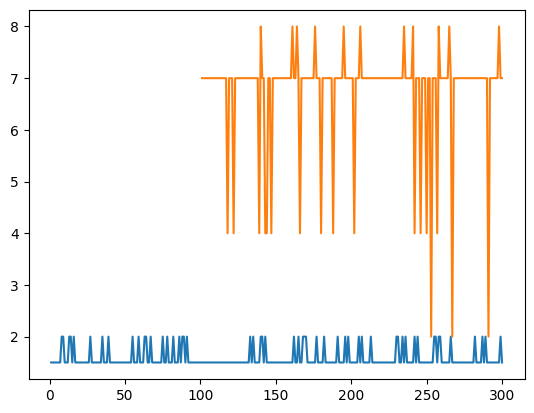

In [213]:
plt.plot(np.arange(1,301),neigh_diff[700:1000])
plt.plot(np.arange(1,301),diff[700:1000])

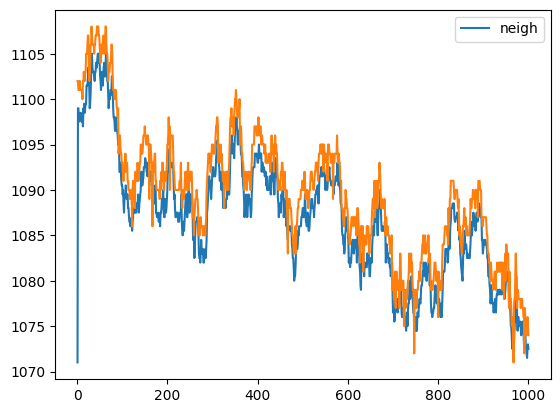

In [193]:
plt.plot(np.arange(1,1001),(np.asarray(df['ask'][:1000], float)),label='neigh')
plt.plot(np.arange(1,1001),df_orch['ask_price_1'][:1000])
plt.legend()

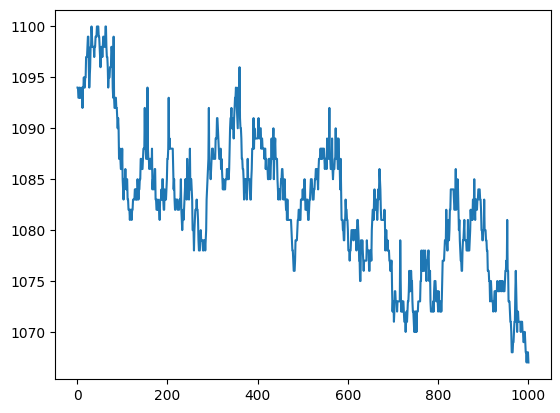

In [175]:
#plt.plot(df['bid'][:1000])


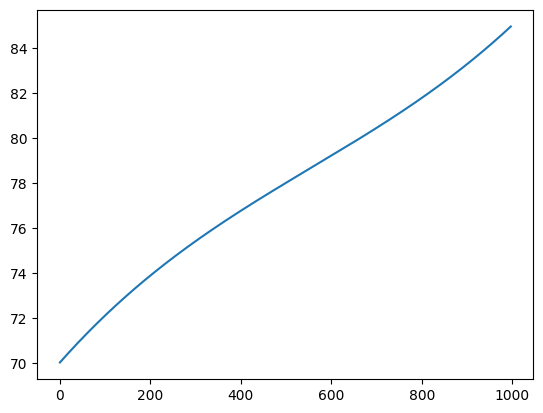

In [189]:
plt.plot(np.asarray(df['humidity'][2:], float))

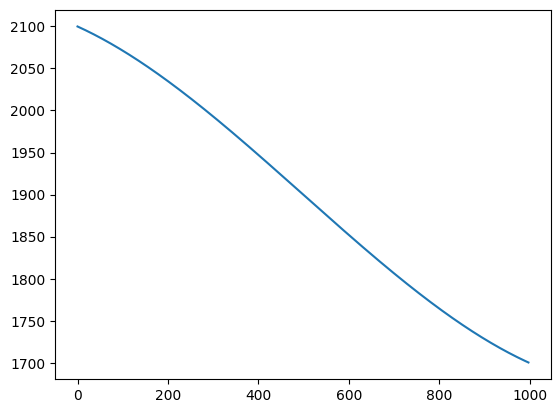

In [192]:
plt.plot(np.asarray(df['sunlight'][2:], float))

In [188]:
df['humidity']

0       84.98128
1           70.0
2       70.02271
3      70.045395
4       70.06803
         ...    
995     84.88814
996      84.9067
997      84.9253
998     84.94393
999     84.96259
Name: humidity, Length: 1000, dtype: object